In [1]:
# importar libreria y cargar datos
import pandas as pd 
data = pd.read_csv('Walmart_Sales.csv')

In [2]:
# explorar datos
print(data.head())
print(data.info())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6439 entries, 0 to 6438
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6439 non-null   int64  
 1   Date          6439 non-null   object 
 2   Weekly_Sales  6439 non-null   float64
 3   Holiday_Flag  6439 non-null   i

In [5]:
# Convertir la columna 'Date' al tipo datetime especificando el formato mixto
data['Date'] = pd.to_datetime(data['Date'], format='mixed', dayfirst=True)

# Eliminar filas con valores nulos
data = data.dropna()

# Mostrar información de los datos
print(data.head())
print(data.info())



   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6439 entries, 0 to 6438
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6439 non-null   int64         
 1   Date          6439 non-null   datetime64[ns]
 2   Weekly_Sales  6439 non-null   float64       
 3   Ho

In [6]:
# Seleccionar caracteristicas
features = data[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
target = data['Weekly_Sales']

In [7]:
# Dividir datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [8]:
# Entrenar modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Evaluar modelo
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 275168075837.2842


In [10]:
# Probar Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 20584167724.488712


In [11]:
# Impacto de los Días Festivos en las Ventas:
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(holiday_sales)

Holiday_Flag
0    1.040741e+06
1    1.120423e+06
Name: Weekly_Sales, dtype: float64


##### Se observa que el promedio de ventas de los dias festivos es mayor al promedio de ventas en dias comunes.

In [12]:
# Rendimiento de las tiendas
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(store_sales)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237685e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996281e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010725e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.548803e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64


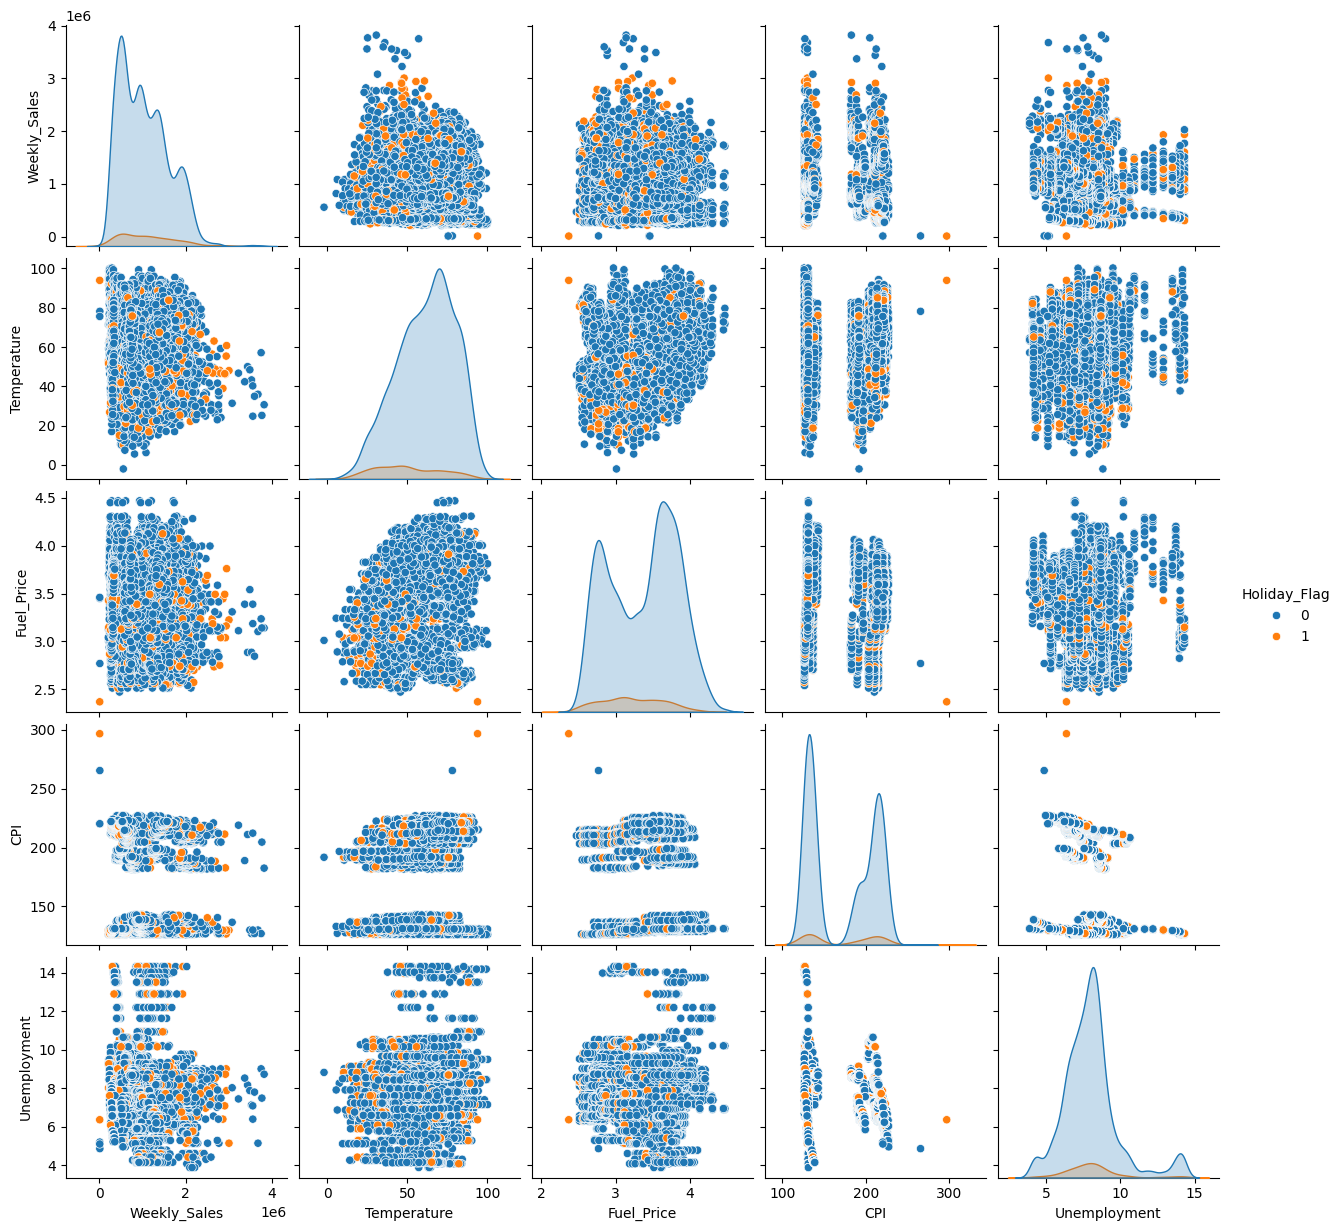

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el pairplot con dos colores según la variable 'Holiday_Flag'
sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']], hue='Holiday_Flag')
plt.show()

In [15]:
# Prediccion
model = LinearRegression()
model.fit(X_train, y_train)

# Crear un nuevo conjunto de datos
new_data = pd.DataFrame({
    'Store': [1, 2],
    'Holiday_Flag': [0, 1],
    'Temperature': [45.0, 30.0],
    'Fuel_Price': [2.5, 2.7],
    'CPI': [211.0, 212.0],
    'Unemployment': [8.0, 7.5]
})

# Hacer predicciones
predictions = model.predict(new_data)
print(predictions)


[1292918.59634898 1377349.56024017]


Predicciones obtenidas:

Para la tienda 1:

Sin día festivo (Holiday_Flag = 0)

Temperatura: 45.0

Precio del combustible: 2.5

CPI: 211.0

Tasa de desempleo: 8.0

Ventas semanales estimadas: 1,292,918.60

Para la tienda 2:

Con día festivo (Holiday_Flag = 1)

Temperatura: 30.0

Precio del combustible: 2.7

CPI: 212.0

Tasa de desempleo: 7.5

Ventas semanales estimadas: 1,377,349.56

Estas predicciones proporcionan una estimación de las ventas semanales basadas en las características proporcionadas